# Pymaceuticals Inc.
---

### Analysis

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Study_Summary = pd.merge(mouse_metadata,study_results, how='left',on='Mouse ID')

# Display the data table for preview
Study_Summary.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
Study_Summary['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_Mice = Study_Summary.loc[Study_Summary.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_Mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_Mice_df= Study_Summary.loc[Study_Summary["Mouse ID"]=="g989",:]
duplicate_Mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study_summary= Study_Summary[Study_Summary['Mouse ID'].isin(duplicate_Mice_df['Mouse ID'])==False]
cleaned_study_summary.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Study_Summary1.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=True, ignore_index=True)

In [7]:
cleaned_study_summary['Mouse ID'].nunique()

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Mean_Volume = cleaned_study_summary.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Median_Volume = cleaned_study_summary.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Variance_Volume = cleaned_study_summary.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Standard_deviation_Volume = cleaned_study_summary.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM_Volume = cleaned_study_summary.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

SEM_Volume


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Summary_statistics = pd.DataFrame({"Mean Tumor Volume": Mean_Volume,
                                   "Median Tumor Volume": Median_Volume,
                                   "Tumor Volume Variance": Variance_Volume,
                                   "Tumor Volume Std. Dev.":Standard_deviation_Volume,
                                   "Standard_deviation_Volume": SEM_Volume})

Summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Standard_deviation_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single lin
# Summary_Aggregation =  cleaned_study_summary.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
# Summary_Aggregation

## Bar and Pie Charts

In [10]:
bar_plot_Data= cleaned_study_summary.groupby('Drug Regimen')['Timepoint'].count()

In [11]:
bar_plot_Data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

Text(0.5, 0, 'Drug Regimen')

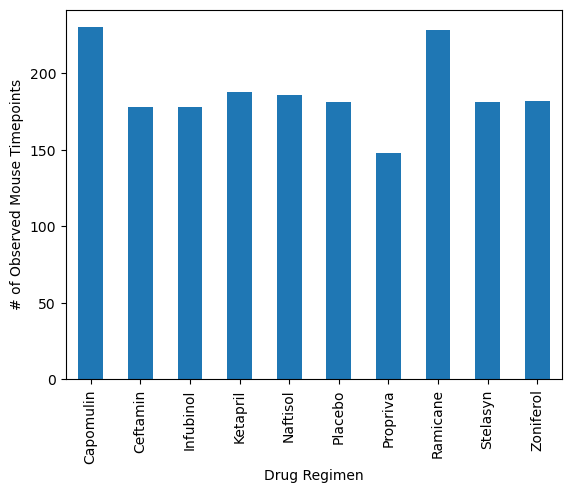

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandass_plot=bar_plot_Data.plot.bar()
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')

In [18]:
bar_plot_Data.dtypes

dtype('int64')

In [19]:
#Setting y_axis values 
y1_values= bar_plot_Data

In [36]:
#Setting x_axis values 
x_values1 = Study_Summary['Drug Regimen'].unique()

In [26]:
x_values1

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

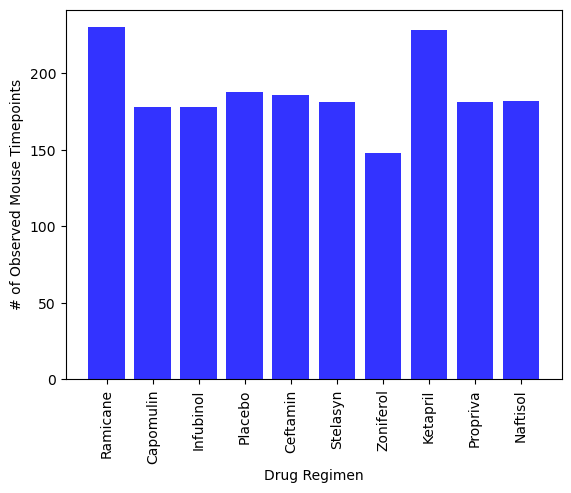

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_values, y1_values,color='b', alpha=0.8, align="center")
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation="vertical")
plt.show()

In [37]:
Study_Summary.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [81]:
#Extracting the data count for female and male from DataFrame
Pie_Gender_Count=cleaned_study_summary["Sex"].value_counts()

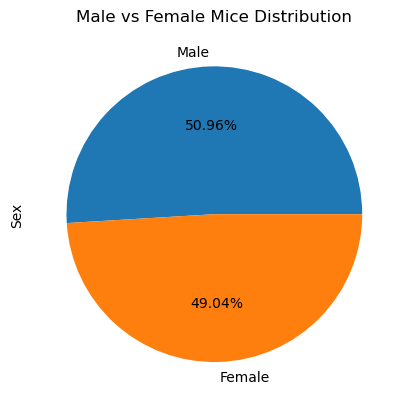

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Pie_Gender_Count.plot.pie(autopct= "%1.2f%%")
plt.title("Male vs Female Mice Distribution")
plt.show()

In [88]:
#Preparing the data for male and female count to plot pie chart
male_count = (cleaned_study_summary["Sex"]== "Male").sum()
female_count = (cleaned_study_summary["Sex"]== "Female").sum()
sex_count = [male_count,female_count]

In [99]:
#Setting labels and colors for pie chart
labels = ["Male", "Female"]
colors= ['blue','orange']

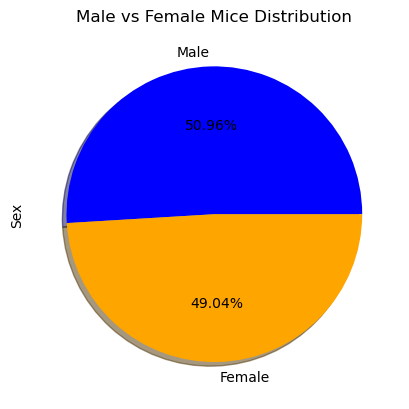

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True)
plt.title("Male vs Female Mice Distribution")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [163]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin
# tumor_volume_Capomulin = cleaned_study_summary.loc[cleaned_study_summary["Drug Regimen"] == "Capomulin"]
# tumor_volume_Ramicane=cleaned_study_summary.loc[cleaned_study_summary["Drug Regimen"] == "Ramicane"]
# tumor_volume_Infubinol=cleaned_study_summary.loc[cleaned_study_summary["Drug Regimen"] == "Infubinol"] 
# tumor_volume_Ceftamin=cleaned_study_summary.loc[cleaned_study_summary["Drug Regimen"] == "Ceftamin"] 
# tumor_volume_Ceftamin


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [194]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_point=  cleaned_study_summary.groupby(["Mouse ID"])["Timepoint"].max()
last_time_point = last_time_point.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merged_data = last_time_point.merge(cleaned_study_summary,on=["Mouse ID", "Timepoint"], how="left")
new_merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [211]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_fina_vol_data= []


for treatments in Treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_volume_df = new_merged_data.loc[new_merged_data["Drug Regimen"]== treatments, "Tumor Volume (mm3)"]
    
    #Adding final volume for each treatment into the new list
    tumor_fina_vol_data.append(last_volume_df)
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = last_volume_df.quantile([0.25,.5,.75])
    lower_quart = quartiles[0.25]
    upper_quart = quartiles[0.75]
    inter_q = upper_quart-lower_quart
    Lower_Bound = lower_quart - (1.5*inter_q)
    upper_Bound = upper_quart + (1.5*inter_q)
    
    outliers_volume = last_volume_df.loc[(last_volume_df<Lower_Bound) | (last_volume_df > upper_Bound)]
    
    print(f"{treatments} Potential outlier is: {outliers_volume} ")
    
    # Determine outliers using upper and lower bound

Capomulin Potential outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Ramicane Potential outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Infubinol Potential outlier is: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 
Ceftamin Potential outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64) 


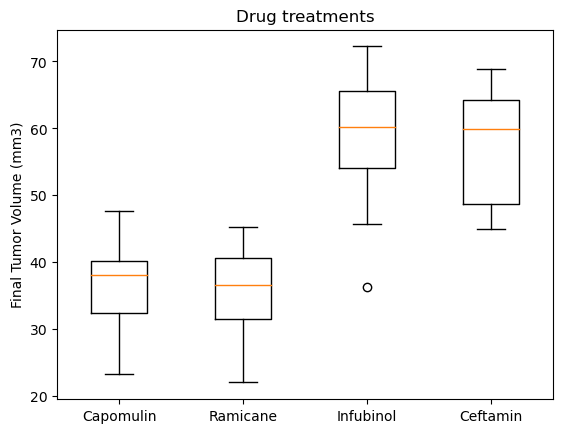

In [215]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Drug treatments')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_fina_vol_data, labels=Treatments)
plt.show()

In [218]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_Volume_df = cleaned_study_summary.loc[cleaned_study_summary["Mouse ID"]=="l509",]

Capomulin_Volume_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


In [227]:
#assinging x values
x_values = Capomulin_Volume_df["Timepoint"]
x_values

371     0
372     5
373    10
374    15
375    20
376    25
377    30
378    35
379    40
380    45
Name: Timepoint, dtype: int64

In [228]:
#Assignign y values
y_values= Capomulin_Volume_df["Tumor Volume (mm3)"]

371    45.000000
372    45.851193
373    46.759074
374    47.488599
375    48.070452
376    44.006257
377    44.708055
378    40.207288
379    40.770813
380    41.483008
Name: Tumor Volume (mm3), dtype: float64

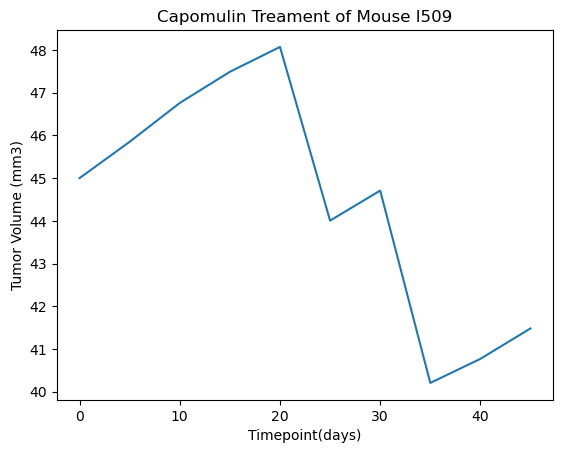

In [242]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(x_values,y_values)
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treament of Mouse l509')
plt.show()

In [250]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df_Capomulin= cleaned_study_summary.loc[cleaned_study_summary["Drug Regimen"]=="Capomulin",]

# avg_volume_Capomulin = Capomulin_Volume_df["Tumor Volume (mm3)"].mean()
# avg_volume_Capomulin
scatter_df_Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [252]:
scatter_df_avg= scatter_df_Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
scatter_df_avg

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [273]:
x_values1 = scatter_df_Capomulin.groupby("Mouse ID")["Weight (g)"].mean()

In [274]:
x_values1.head()

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
Name: Weight (g), dtype: float64

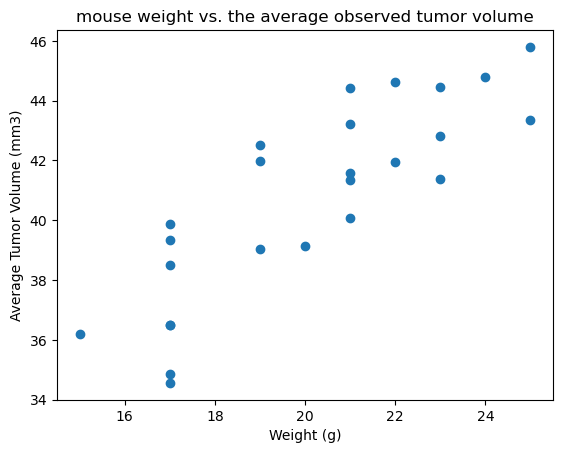

In [275]:
plt.scatter(x_values1,scatter_df_avg)
plt.title("mouse weight vs. the average observed tumor volume")
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression
